In [1]:
import numpy as np
import pandas as pd
import obspy
import obspy.signal.filter
from obspy import UTCDateTime
from pnwstore.mseed import WaveformClient
client = WaveformClient()
import datetime
import scipy
import glob
import sys
import os
import math
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib
import multiprocessing
from functools import partial

sys.path.append('/home/koepflma/project1/Mt-St-Helens')
from functions import *

In [105]:
net = 'UW'
sta = 'SHW'
cha = '*'
year = 2004
#jday = 272
jdays = range(270,280)

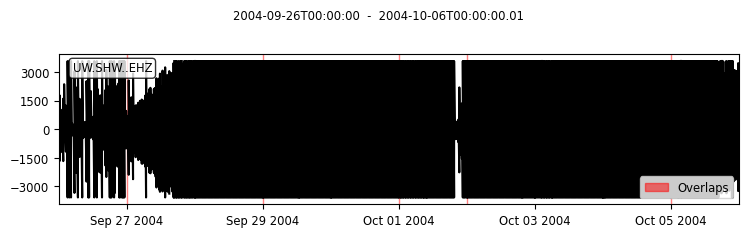

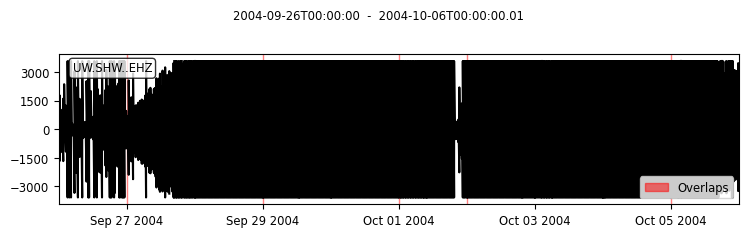

In [106]:
st = obspy.Stream()
for jday in jdays:
    st_r = read_stream(net, sta, cha, year, jday)
    st += st_r
st.plot()

In [23]:
s1 = 'UW-EDM-EHZ'
s2 = 'UW-HSR-EHZ'
s3 = 'UW-SHW-EHZ'
s4 = 'CC-JRO-BHZ'
s_list = [s1,s2]#,s3,s4]
days = [str(i) for i in np.arange(50,60+1)]

In [83]:
day_netstacha = [tuple([str(i)]+[s]) for i in days for s in s_list]

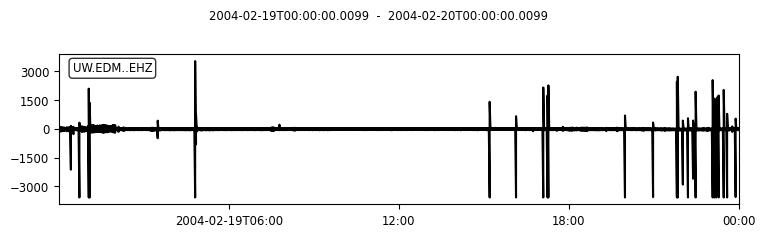

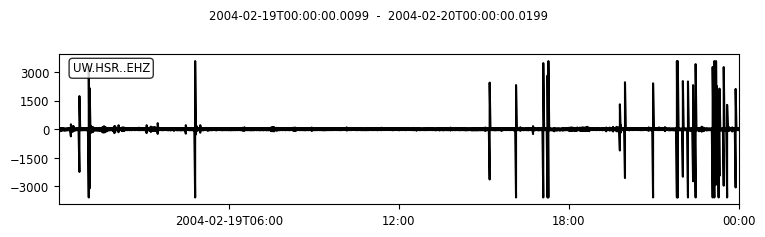

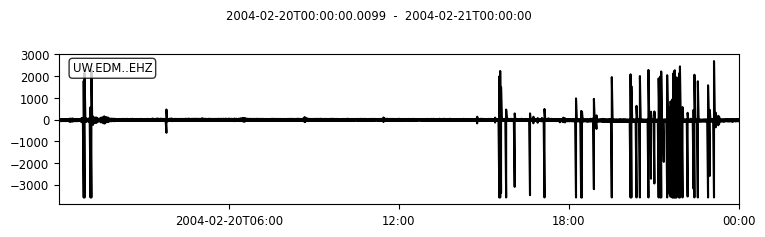

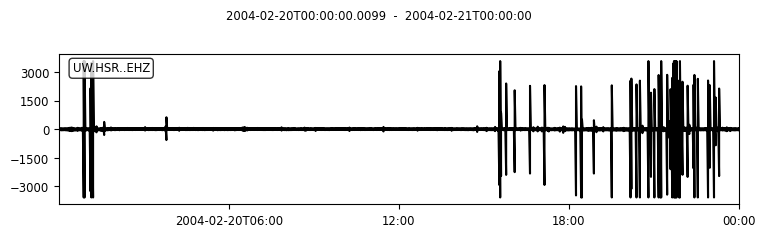

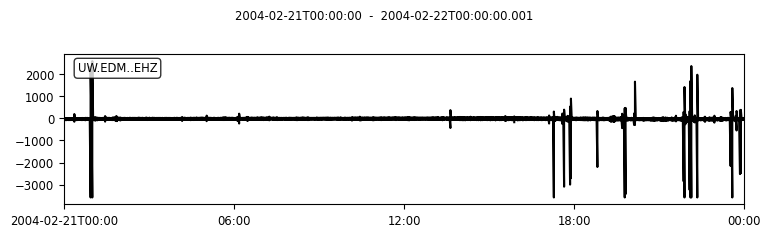

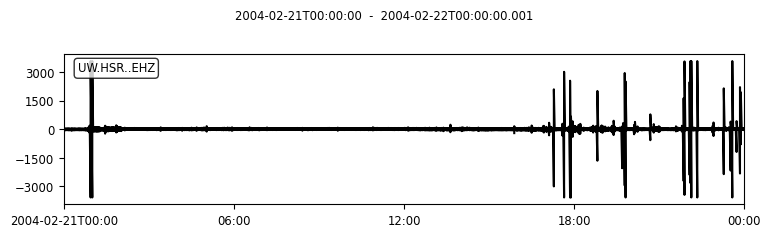

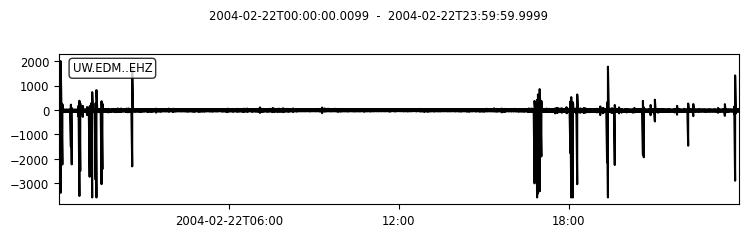

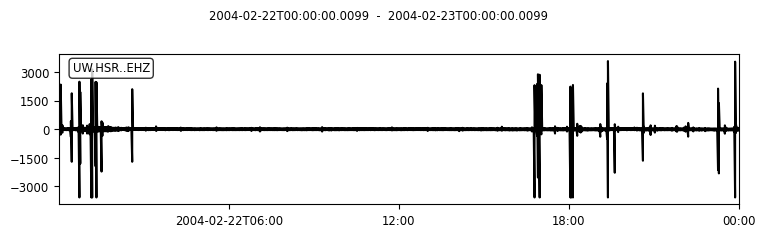

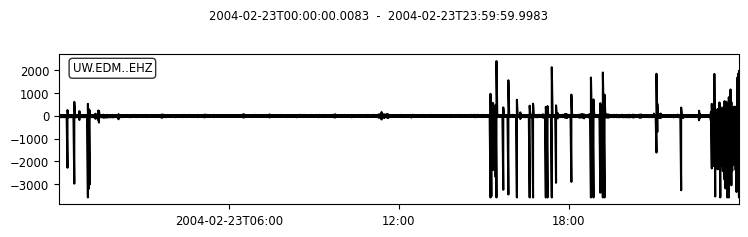

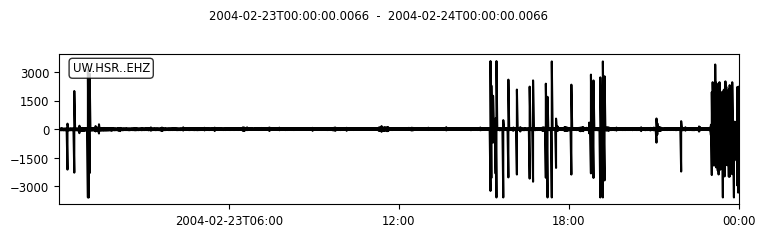

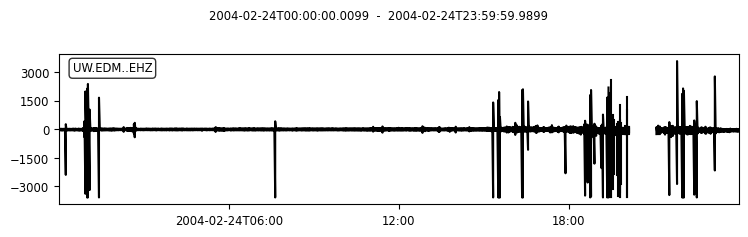

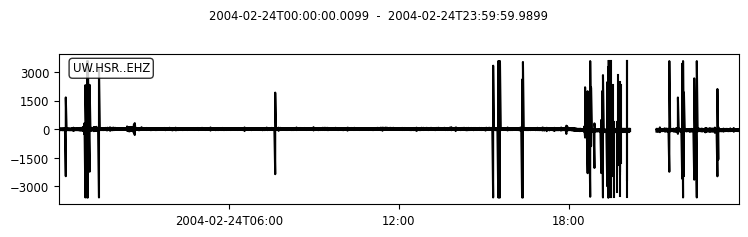

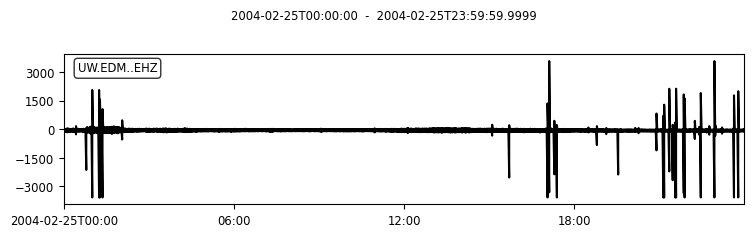

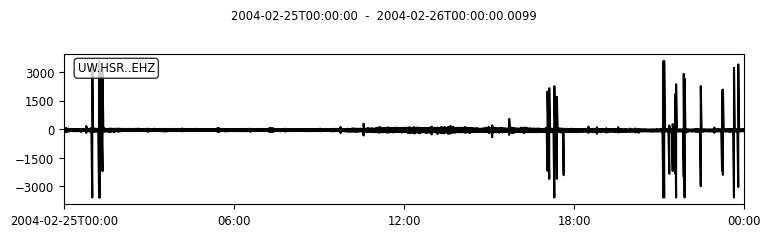

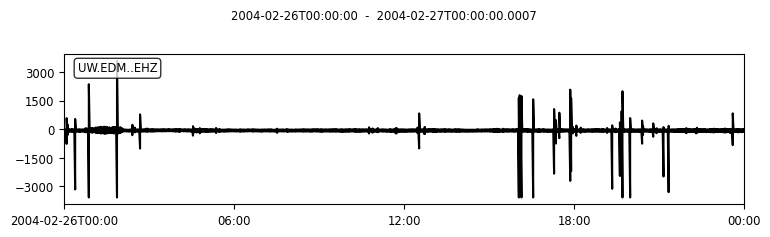

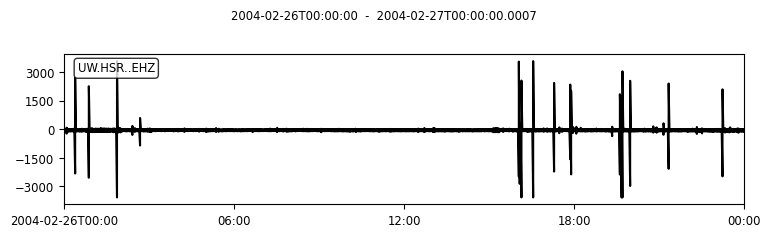

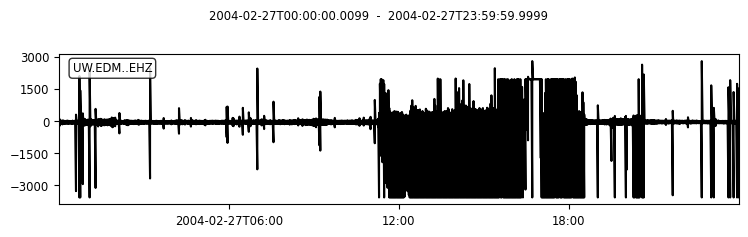

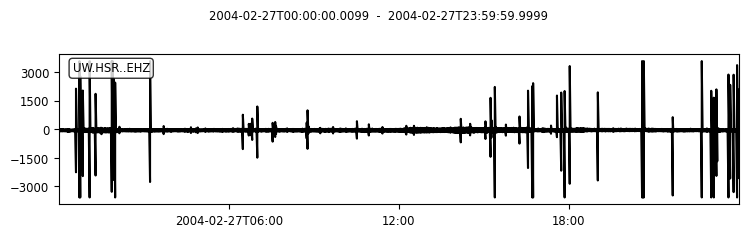

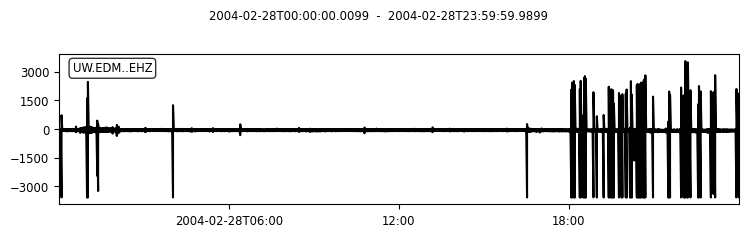

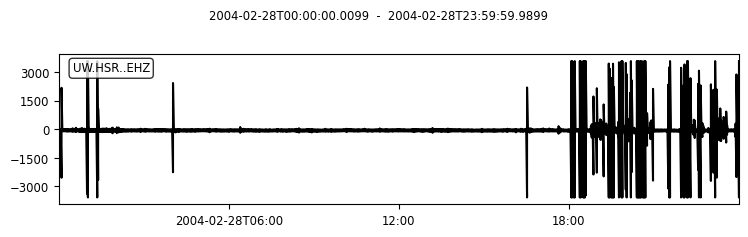

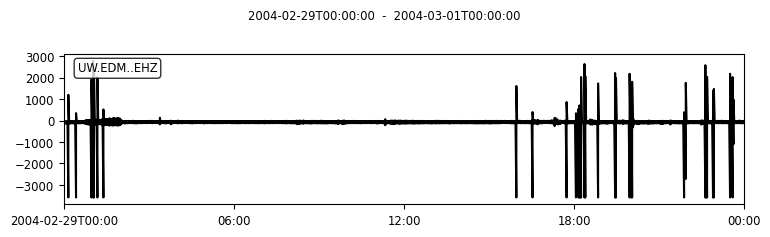

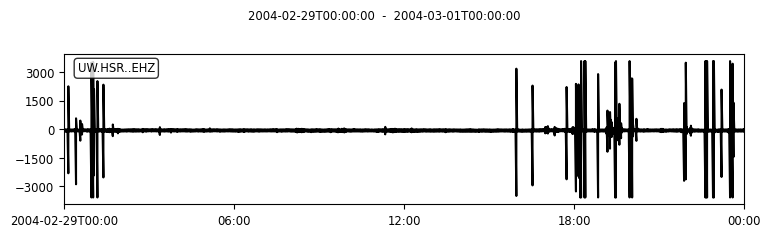

In [84]:
year = 2004
for xx in day_netstacha:
    jday = int(xx[0])
    netstacha = xx[1].split('-')
    net = netstacha[0]
    sta = netstacha[1]
    cha = netstacha[2]
    try:
        st_r = read_stream(net, sta, cha, year, jday)
        st_r.plot()
    except:
        print(xx)
        pass

In [67]:
st_r = read_stream('CC', 'JRO', 'BHZ', 2005, 10)
st_r

6 Trace(s) in Stream:
CC.JRO..BHZ | 2005-01-10T00:00:00.000000Z - 2005-01-10T04:07:36.980000Z | 50.0 Hz, 742850 samples
CC.JRO..BHZ | 2005-01-10T04:08:07.020000Z - 2005-01-10T06:10:46.980000Z | 50.0 Hz, 367999 samples
CC.JRO..BHZ | 2005-01-10T06:11:07.020000Z - 2005-01-10T10:46:46.980000Z | 50.0 Hz, 826999 samples
CC.JRO..BHZ | 2005-01-10T10:46:57.020000Z - 2005-01-10T11:59:26.980000Z | 50.0 Hz, 217499 samples
CC.JRO..BHZ | 2005-01-10T11:59:47.020000Z - 2005-01-10T12:30:26.980000Z | 50.0 Hz, 91999 samples
CC.JRO..BHZ | 2005-01-10T12:34:07.000000Z - 2005-01-10T23:59:59.980000Z | 50.0 Hz, 2057650 samples

In [76]:
st_r = read_stream(net, sta, cha, year, jday)
st_r

0 Trace(s) in Stream:


In [66]:
str(jday).zfill(3)

'002'

In [8]:
UTCDateTime(year=year, julday=jday, hour=12)

2004-12-06T12:00:00.000000Z

In [19]:
net = 'UW'
sta = 'EDM'
cha = '*'
year = 2004
jday = 356
hour = 6
dt = 6 # in hour
start = UTCDateTime(year=year, julday=jday, hour=hour)
end = UTCDateTime(year=year, julday=jday, hour=hour+dt)

stream = client.get_waveforms(network='{}'.format(net), station='{}'.format(sta), channel='{}'.format(cha), 

                              year='{}'.format(year), doy='{}'.format(jday))

stream.merge()
stream = stream.slice(start,end)

3 Trace(s) in Stream:
CC.JRO..BHE | 2004-12-06T06:00:00.000000Z - 2004-12-06T12:00:00.000000Z | 50.0 Hz, 1080001 samples
CC.JRO..BHN | 2004-12-06T06:00:00.000000Z - 2004-12-06T12:00:00.000000Z | 50.0 Hz, 1080001 samples
CC.JRO..BHZ | 2004-12-06T06:00:00.000000Z - 2004-12-06T12:00:00.000000Z | 50.0 Hz, 1080001 samples

In [21]:
stream = stream.slice(start,end)
stream

3 Trace(s) in Stream:
CC.JRO..BHE | 2004-12-06T06:00:00.000000Z - 2004-12-06T12:00:00.000000Z | 50.0 Hz, 1080001 samples
CC.JRO..BHN | 2004-12-06T06:00:00.000000Z - 2004-12-06T12:00:00.000000Z | 50.0 Hz, 1080001 samples
CC.JRO..BHZ | 2004-12-06T06:00:00.000000Z - 2004-12-06T12:00:00.000000Z | 50.0 Hz, 1080001 samples

In [ ]:
# read data to stream
net = 'UW'
sta = 'EDM'
cha = 'EHZ'
year = 2018
jday = 160

st_r = read_stream(net, sta, cha, year, jday)


# correct insrument response ------------------------------------------------------------------------------------------
inv = obspy.read_inventory('/auto/pnwstore1-wd11/PNWStationXML/{}/{}.{}.xml'.format(net,net,sta))
pre_filt = [1e-3, 5e-2, 45, 50]
water_level = 60
st = st_r
st.plot()

for tr in st:
    s_time_str = str(tr.stats['starttime']).split('.')[0].replace(':', '-')
    tr.remove_response(inventory=inv, zero_mean=True,taper=True, taper_fraction=0.05,
                          pre_filt=pre_filt, output="VEL", water_level=water_level,
                          plot=False)
#                           plot='sensor_response_tests/{}__pre_filt{}-{}_{}-{}__water_level{}.png'.format(
#                           s_time_str,
#                           pre_filt[0], pre_filt[1], pre_filt[2], pre_filt[3], water_level))


# merge traces -------------------------------------------------------------------------------------------------------
st.merge()
st.plot()

Text(0.04, 0.5, 'counts')

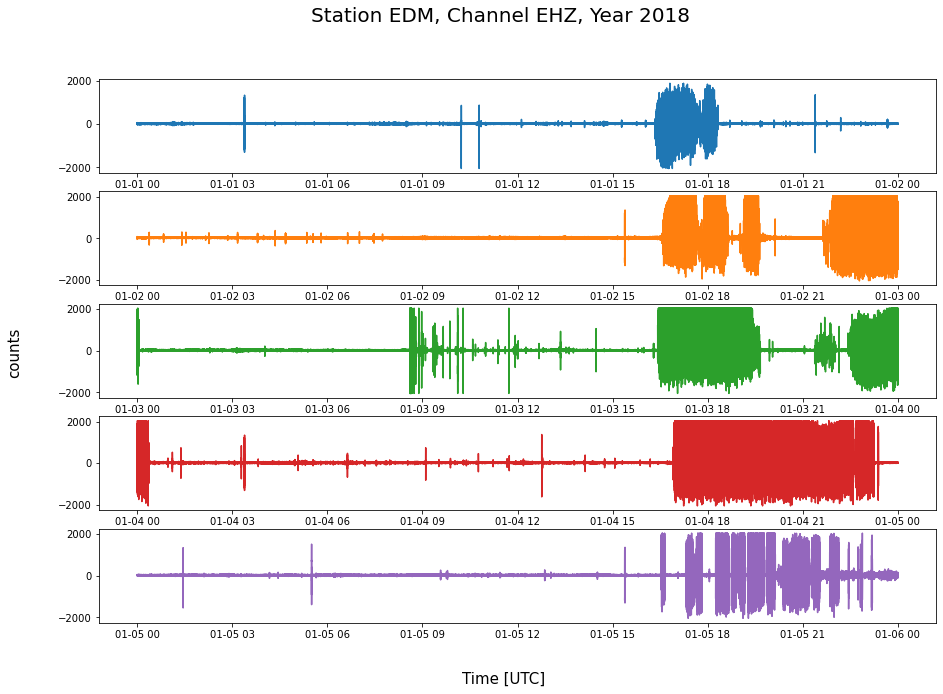

In [2]:
net = 'UW'
sta = 'EDM'
cha = 'EHZ'
year = 2018
jdays = range(1,6)

#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15, 10), sharex=True)
fig, ax = plt.subplots(len(jdays), figsize=(15, 10))

for i,jday in enumerate(jdays):
    st_r = read_stream(net, sta, cha, year, jday)
    st_m = st_r.copy().merge()
    ax[i].plot(st_m[0].times("matplotlib"), st_m[0].data, "C{}".format(i))
    ax[i].xaxis_date()
fig.suptitle('Station EDM, Channel EHZ, Year 2018 ', fontsize=20)
fig.text(0.5, 0.04, 'Time [UTC]', ha='center', fontsize=15)
fig.text(0.04, 0.5, 'counts', va='center', rotation='vertical', fontsize=15)
#fig.tight_layout()

In [23]:
s1 = 'UW-EDM-EHZ'
s2 = 'UW-SHW-EHZ'
s3 = 'UW-HSR-EHZ'
s4 = 'UW-SOS-EHZ'
s5 = 'UW-JUN-EHZ'
s6 = 'CC-JRO-BHZ'
s7 = 'CC-VALT-BHZ'
s8 = 'CC-SEP-BHZ'
s9 = 'CC-STD-BHZ'
s_list = [s1,s2,s3,s4,s5,s6,s7,s8,s9]
year = 2016
jdays = range(356,356+1)

Text(0.04, 0.5, 'counts')

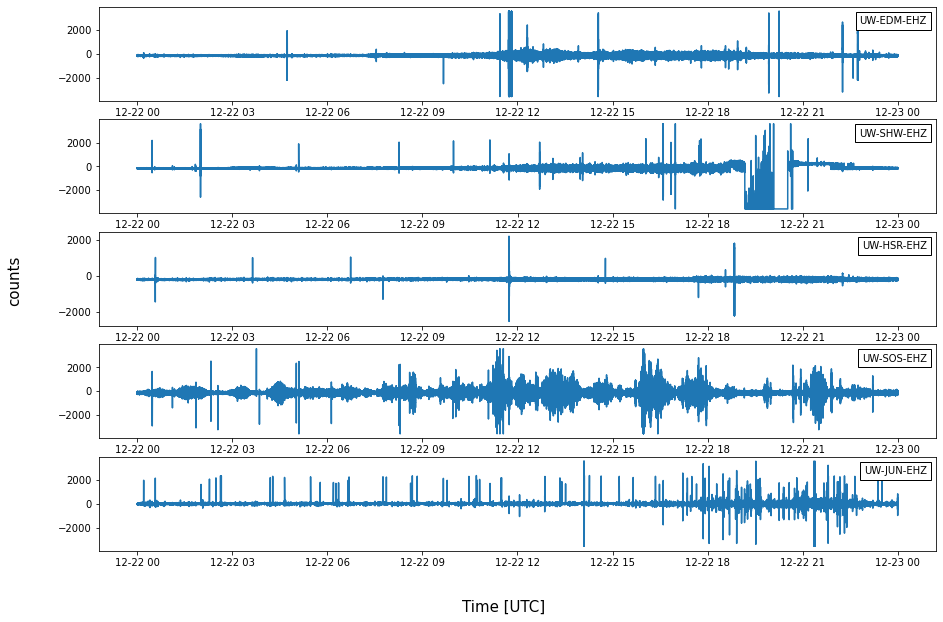

In [3]:
#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15, 10), sharex=True)
fig, ax = plt.subplots(len(s_list), figsize=(15, 10))

for i,xx in enumerate(s_list):
    netstacha = xx.split('-')
    net = netstacha[0]
    sta = netstacha[1]
    cha = netstacha[2]

    for j,jday in enumerate(jdays):
        st_r = read_stream(net, sta, cha, year, jday)
        st_m = st_r.copy().merge()
        ax[i].plot(st_m[0].times("matplotlib"), st_m[0].data, "C{}".format(j))
        ax[i].xaxis_date()
    #ax[i].text(0.04, 0.5, '{}'.format(xx), fontsize = 22)
    #ax[i].text(0.9, 0.85, '{}'.format(xx), fontsize=10,transform=plt.gca().transAxes)
    at = matplotlib.offsetbox.AnchoredText('{}'.format(xx), prop=dict(size=10), loc='upper right')
    #at.patch.set_boxstyle(boxstyle=None)
    ax[i].add_artist(at)
        
#fig.suptitle('Station EDM, Channel EHZ, Year 2018 ', fontsize=20)
fig.text(0.5, 0.04, 'Time [UTC]', ha='center', fontsize=15)
fig.text(0.04, 0.5, 'counts', va='center', rotation='vertical', fontsize=15)
#fig.tight_layout()

Text(0.04, 0.5, 'counts')

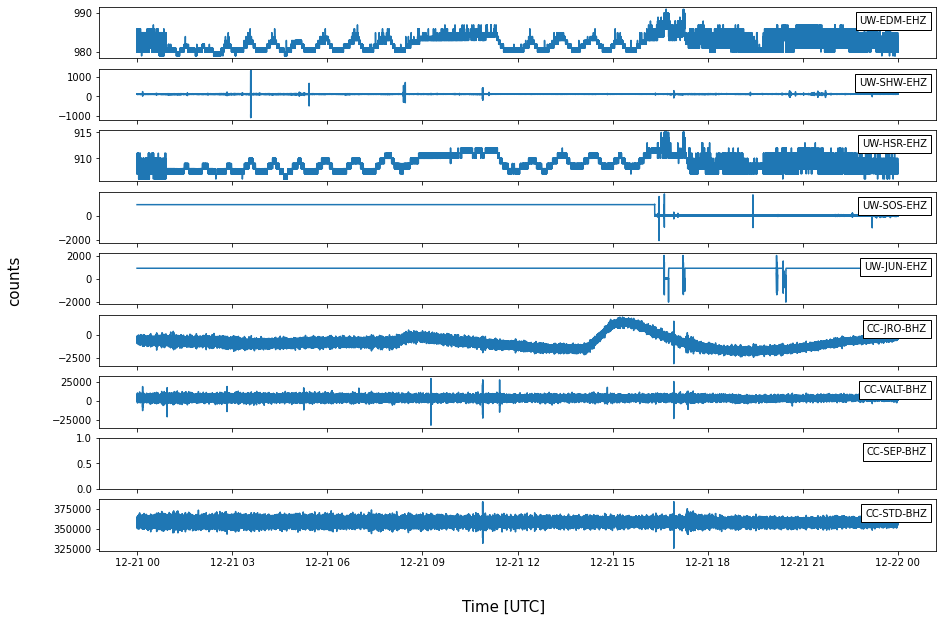

In [24]:
#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15, 10), sharex=True)
fig, ax = plt.subplots(len(s_list), figsize=(15, 10), sharex=True)

for i,xx in enumerate(s_list):
    netstacha = xx.split('-')
    net = netstacha[0]
    sta = netstacha[1]
    cha = netstacha[2]

    for j,jday in enumerate(jdays):
        st_r = read_stream(net, sta, cha, year, jday)
        for ij,tr in enumerate(st_r):
            ax[i].plot(tr.times("matplotlib"), tr.data, "C{}".format(ij))
            ax[i].xaxis_date()
    #ax[i].text(0.9, 0.85, '{}'.format(xx), fontsize=10,transform=plt.gca().transAxes)
    at = matplotlib.offsetbox.AnchoredText('{}'.format(xx), prop=dict(size=10), loc='upper right')
    #at.patch.set_boxstyle(boxstyle=None)
    ax[i].add_artist(at)
        
#fig.suptitle('Station EDM, Channel EHZ, Year 2018 ', fontsize=20)
fig.text(0.5, 0.04, 'Time [UTC]', ha='center', fontsize=15)
fig.text(0.04, 0.5, 'counts', va='center', rotation='vertical', fontsize=15)
#fig.tight_layout()

In [18]:
st_t = st_r.copy()
st_t.decimate(4)
st_t

1 Trace(s) in Stream:
CC.STD..BHZ | 2016-12-21T00:00:00.000000Z - 2016-12-21T23:59:59.920000Z | 12.5 Hz, 1080000 samples

In [20]:
st_t = st_r.copy()
st_t.resample(25)
st_t

1 Trace(s) in Stream:
CC.STD..BHZ | 2016-12-21T00:00:00.000000Z - 2016-12-21T23:59:59.960000Z | 25.0 Hz, 2160000 samples

In [57]:
net = 'CC'
sta = 'JRO'
cha = 'BHN'
year = 2004
jday = 356
# st_long = obspy.Stream()
# for jday in range(247,248):
#     st_r = read_stream(net, sta, cha, year, jday)
#     st_long += st_r
# st_long

st_r = read_stream(net, sta, cha, year, jday)
st_r

1 Trace(s) in Stream:
CC.JRO..BHN | 2004-12-21T00:00:00.000000Z - 2004-12-21T23:59:59.980000Z | 50.0 Hz, 4320000 samples

1 Trace(s) in Stream:
CC.JRO..BHN | 2004-12-21T00:00:00.000000Z - 2004-12-21T23:59:59.980000Z | 50.0 Hz, 4320000 samples

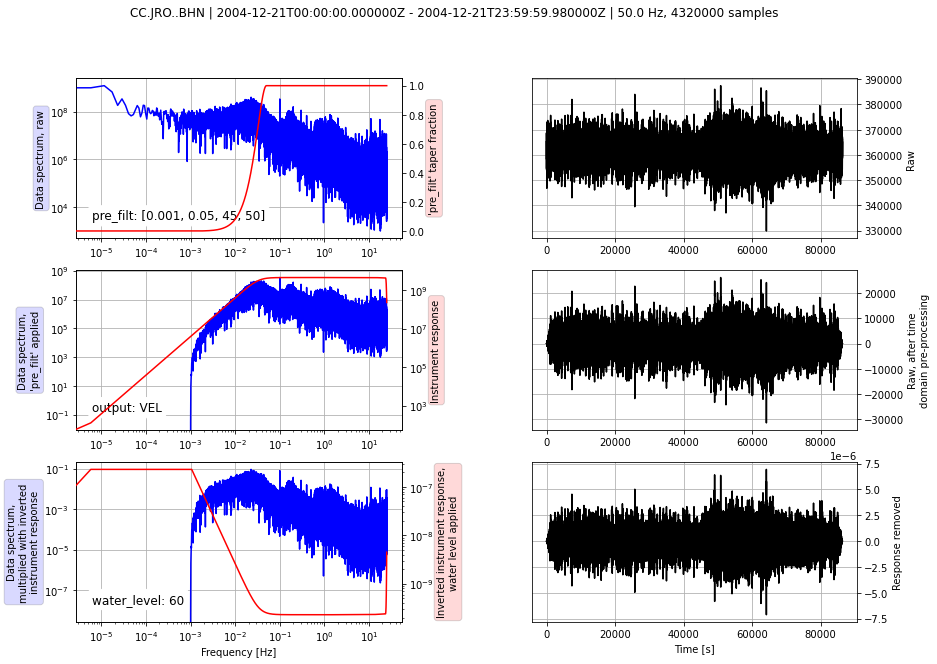

In [58]:
# correct insrument response
inv = obspy.read_inventory('/auto/pnwstore1-wd11/PNWStationXML/{}/{}.{}.xml'.format(net,net,sta))
pre_filt = [1e-3, 5e-2, 45, 50]
water_level = 60
st = st_r.copy()
for tr in st:
    s_time_str = str(tr.stats['starttime']).split('.')[0].replace(':', '-')
    tr.remove_response(inventory=inv, zero_mean=True,taper=True, taper_fraction=0.05,
                          pre_filt=pre_filt, output="VEL", water_level=water_level,
                          plot=True)
#                           plot='sensor_response_tests/{}__pre_filt{}-{}_{}-{}__water_level{}.png'.format(
#                           s_time_str,
#                           pre_filt[0], pre_filt[1], pre_filt[2], pre_filt[3], water_level))

st

Text(0.5, 1.0, 'CC-JRO-BHN 2004')

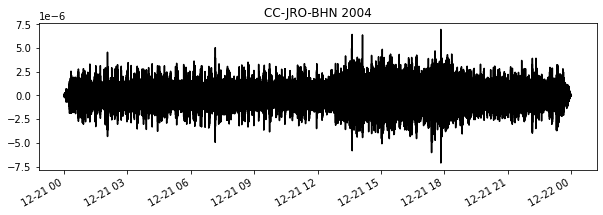

In [59]:
fig = plt.figure(figsize=(10, 3))
ax = fig.add_subplot()
st.merge()
ax.plot(st[0].times("matplotlib"), st[0].data, "k")
ax.xaxis_date()
fig.autofmt_xdate(rotation=30)
ax.set_title('{}-{}-{} {}'.format(net,sta,cha, year))

AttributeError: 'Stream' object has no attribute 'times'

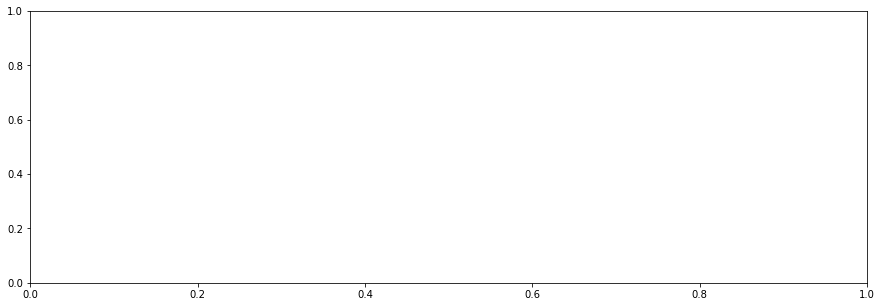

In [28]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot()
for i in range(len(st_r)):
    ax.plot(st_r[i].times("matplotlib"), st_r[i].data, "C{}".format(i))
ax.xaxis_date()
fig.autofmt_xdate()
plt.show()

In [5]:
import obspy
obspy.read('/1-fnp/pnwstore1/p-wd07/PNW2013/UW/2013/001/ALCT.UW.2013.001')

FileNotFoundError: [Errno 2] No such file or directory: '/1-fnp/pnwstore1/p-wd07/PNW2013/UW/2013/001/ALCT.UW.2013.001'

In [ ]:
# resample
tr_copy = tr.copy()
import numpy.ma as ma
tr_copy.data = ma.masked_array(data=tr_copy.data,
             mask=np.isnan(tr_copy.data))
st_res = tr_copy.split()
st_res.resample(50.)
    
fig = plt.figure(figsize=(6.4*2,4.8))
plt.plot([tr.stats.starttime.datetime+datetime.timedelta(seconds=t) for t in tr.times()[::100]], 
         tr.data[::100])

for trace in st_res:
    plt.plot([trace.stats.starttime.datetime+datetime.timedelta(seconds=t) for t in trace.times()[::100]], 
             trace.data[::100], alpha=0.5)